# Principle Components Regression 

This short programming assignment will show how principal components can be used as a dimensionality reduction preprocessing step.

You will begin by treating principal component regression as a linear model with PCA transformations in the preprocessing. But using the tidymodels framework then this is still mostly one model. Once again you begin by loading the appopriate packages and loading up the training and testing sets.

In [ ]:
library(tidymodels)
library(ISLR2)
Hitters <- as_tibble(Hitters) %>%
  filter(!is.na(Salary))

Hitters_split <- initial_split(Hitters, strata = "Salary")

Hitters_train <- training(Hitters_split)
Hitters_test <- testing(Hitters_split)

Hitters_fold <- vfold_cv(Hitters_train, v = 10)

You now set up the following specifications 

In [ ]:
lm_spec <- 
  linear_reg() %>% 
  set_mode("regression") %>% 
  set_engine("lm")

The preprocessing recipe will look like the recipe you saw in the ridge and lasso sections. The main difference is that you end the recipe with `step_pca()` which will perform `principal component analysis` on all the predictors, and return the components that explain `threshold` percent of the variance. You have set `threshold = tune()` so you can treat the threshold as a hyperparameter to be tuned. By using workflows and tune together can be tune parameters in the preprocessing as well as parameters in the models.

In [ ]:
pca_recipe <- 
  recipe(formula = Salary ~ ., data = Hitters_train) %>% 
  step_novel(all_nominal_predictors()) %>% 
  step_dummy(all_nominal_predictors()) %>% 
  step_zv(all_predictors()) %>% 
  step_normalize(all_predictors()) %>%
  step_pca(all_predictors(), threshold = tune())

pca_workflow <- 
  workflow() %>% 
  add_recipe(pca_recipe) %>% 
  add_model(lm_spec)

Now you will create a smaller grid for threshold and we don’t need to modify the range since [0, 1] is an acceptable range. Have your outpur variable be `threshold_grid`. Use the `grid_regular` function with `10` levels. 

In [ ]:
threshold_grid <- grid_regular(threshold(), levels = 10)

And now you will fit using `tune_grid()`. This time you will actually perform 100 fits since you need to fit a model for each value of threshold within each fold. You will use the output variable `tune_res`. Don't forget to use the `pca_workflow` as part of your `tune_grid()`, as well as the `Hitters_fold` and `threshold_grid`. 


In [ ]:
# *your code here* 

# tune_res <- 

# your code here


In [ ]:
# Hidden tests


Use the output variable `tune_res` and use the function `auto_plot` to plot your output variable. Your plot should resemble this: 

<div> 
    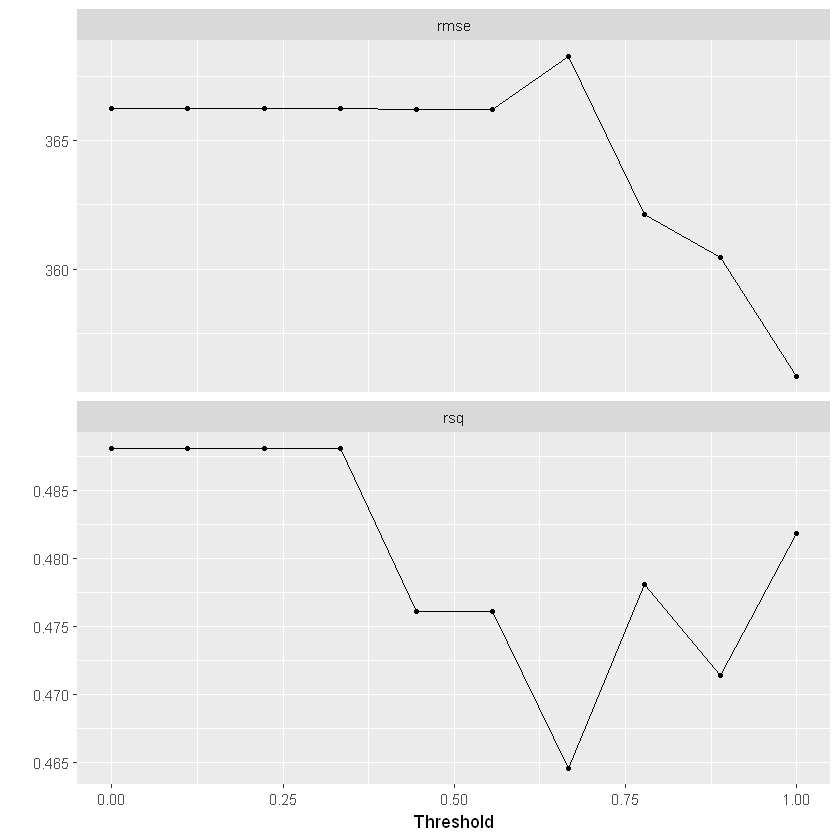
</div>



In [ ]:
autoplot(tune_res)

If your graphs do not match the graphs above, review your code for `tune_res`.

Select the best model using the `select_best()` function. Have your output variable be `best_threshold`. This time, you should use "rmse" for your metric.

In [ ]:
# *your code here*

#best_threshold <- 

# your code here


Your final step now is going to be to fit the model much like have done a couple of times by now. The workflow is finalized using the value we selected with `select_best()`, and training using the full training data set. Your first output variable should be `pca_final` in conjunction with the function `finalize_workflow()`. Your second output variable should be `pca_final_fit` in conjunction with the function `fit`. 

In [ ]:
# YOUR CODE HERE

# pca_final <- 
# pca_final_fit <-

# your code here
